# Загрузка данных

Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [41]:
import pandas as pd
df = pd.read_csv('/content/bank_clients_transactions14.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение столбцов к стилю camel_case

In [42]:
import re

def to_camel_case(column_name):
    # Разделяем слова по пробелам, подчеркиваниям и дефисам
    words = re.split(r'[_\s-]+', column_name)
    # Первое слово с маленькой буквы, остальные с заглавной
    if len(words) == 0:
        return column_name
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Приводим все столбцы к camelCase
df.columns = [to_camel_case(col) for col in df.columns]
print(df.columns)

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount(inr)'],
      dtype='object')


In [43]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


# Приведение типов данных

In [44]:
#привести дату к типу datetime

df['transactiondate'] = pd.to_datetime(df['transactiondate'], format='%d/%m/%y', errors='coerce')
df['customerdob'] = pd.to_datetime(df['customerdob'], format='%d/%m/%y', errors='coerce')
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transactionid           1048567 non-null  object        
 1   customerid              1048567 non-null  object        
 2   customerdob             987831 non-null   datetime64[ns]
 3   custgender              1047467 non-null  object        
 4   custlocation            1048416 non-null  object        
 5   custaccountbalance      1046198 non-null  float64       
 6   transactiondate         1048567 non-null  datetime64[ns]
 7   transactiontime         1048567 non-null  int64         
 8   transactionamount(inr)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


In [47]:
# заполняю опля customerdob, custgender, custlocation, custaccountbalance по совпадению customerid
# Список полей для заполнения
fill_columns = ['customerdob', 'custgender', 'custlocation', 'custaccountbalance']

# 1. Проверяем исходное количество пропусков
print("Исходное количество пропусков:")
print(df[fill_columns].isna().sum())

# 2. Создаем временный DataFrame с уникальными значениями для каждого клиента
customer_data = df.dropna(subset=fill_columns).groupby('customerid')[fill_columns].first().reset_index()

# 3. Заполняем пропуски через merge
for col in fill_columns:
    # Создаем временный DF только с нужными столбцами
    temp_df = customer_data[['customerid', col]].dropna(subset=[col])

    # Объединяем с основным DF
    df = df.merge(temp_df, on='customerid', how='left', suffixes=('', '_filled'))

    # Заполняем пропуски в исходном столбце
    df[col] = df[col].fillna(df[f'{col}_filled'])

    # Удаляем временный столбец
    df.drop(f'{col}_filled', axis=1, inplace=True)

# 4. Проверяем результаты
print("\nКоличество пропусков после заполнения:")
print(df[fill_columns].isna().sum())

Исходное количество пропусков:
customerdob           60736
custgender             1100
custlocation            151
custaccountbalance     2369
dtype: int64

Количество пропусков после заполнения:
customerdob           43925
custgender              819
custlocation            115
custaccountbalance     1702
dtype: int64


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transactionid           1048567 non-null  object        
 1   customerid              1048567 non-null  object        
 2   customerdob             1004642 non-null  datetime64[ns]
 3   custgender              1047748 non-null  object        
 4   custlocation            1048452 non-null  object        
 5   custaccountbalance      1046865 non-null  float64       
 6   transactiondate         1048567 non-null  datetime64[ns]
 7   transactiontime         1048567 non-null  int64         
 8   transactionamount(inr)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


Найдено 55331 некорректных возрастов:
Из них:
- Меньше 0: 55331
- Больше 100: 0

Примеры некорректных записей:
   customerid customerdob   age
1    C2142763  2057-04-04 -32.0
15   C8334633  2068-07-10 -43.0
30   C7648712  2067-01-21 -42.0
51   C6637047  2066-07-25 -41.0
79   C6612422  2067-05-25 -42.0


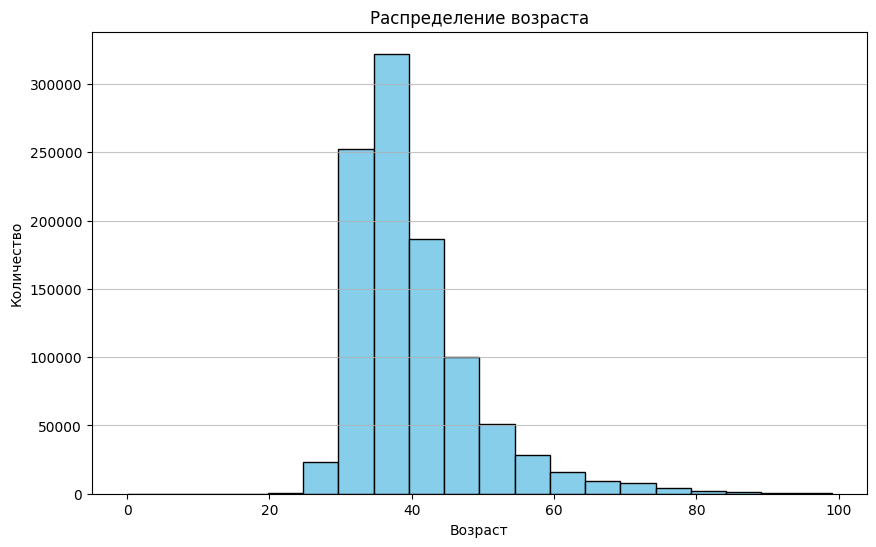

In [49]:
# изучить возраст пользователей (визуализировать)

from datetime import datetime
import matplotlib.pyplot as plt

# Рассчитываем возраст (на сегодняшний день)
current_year = datetime.now().year
df['age'] = current_year - df['customerdob'].dt.year

# Находим некорректные возрасты
invalid_ages = df[(df['age'] < 0) | (df['age'] > 100)]

# Выводим статистику
print(f"Найдено {len(invalid_ages)} некорректных возрастов:")
print("Из них:")
print(f"- Меньше 0: {(df['age'] < 0).sum()}")
print(f"- Больше 100: {(df['age'] > 100).sum()}")

# Выводим примеры некорректных записей (первые 5, если они есть)
if not invalid_ages.empty:
    print("\nПримеры некорректных записей:")
    cols = ['customerid', 'customerdob', 'age']  # Выводим только ключевые столбцы
    print(invalid_ages[cols].head().to_string())
else:
    print("\nНекорректные возраста не обнаружены.")

# Для возрастов < 0 уменьшаем год на 100
mask = df['age'] < 0
df.loc[mask, 'customerdob'] = df.loc[mask, 'customerdob'] - pd.DateOffset(years=100)

# Для возрастов > 100 заменяем на NaN
df.loc[df['age'] > 100, 'customerdob'] = pd.NaT

# Пересчитываем возраст
df['age'] = current_year - df['customerdob'].dt.year

# Гистограмма распределения возрастов
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Поиск дублей и пропусков в данных

In [51]:
df_clean = df.drop_duplicates()
# Удаление строк с любыми пропущенными значениями
df_clean = df_clean.dropna()
print(f"Было строк: {len(df)}")
print(f"Осталось строк: {len(df_clean)}")
print(f"Удалено записей: {len(df) - len(df_clean)}")
df = df_clean
df.info()

Было строк: 1048567
Осталось строк: 1002832
Удалено записей: 45735
<class 'pandas.core.frame.DataFrame'>
Index: 1002832 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transactionid           1002832 non-null  object        
 1   customerid              1002832 non-null  object        
 2   customerdob             1002832 non-null  datetime64[ns]
 3   custgender              1002832 non-null  object        
 4   custlocation            1002832 non-null  object        
 5   custaccountbalance      1002832 non-null  float64       
 6   transactiondate         1002832 non-null  datetime64[ns]
 7   transactiontime         1002832 non-null  int64         
 8   transactionamount(inr)  1002832 non-null  float64       
 9   age                     1002832 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 84.2+ MB

# Исследовательский анализ данных

In [52]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr),age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,31.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,68.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,29.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,52.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,37.0
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,35.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,33.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,36.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,47.0


In [53]:
# сколько уникальных клиентов?

unique_customers = df['customerid'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 839081


In [ ]:
# какое количество транзакций было совершено?

total_transactions = len(df)
print(f"Общее количество транзакций: {total_transactions}")

Общее количество транзакций: 170352


In [31]:
# сколько в среднем транзакций приходится на одного клиента?

# Общее количество транзакций (строк в DataFrame)
total_transactions = len(df)

# Количество уникальных клиентов
unique_customers = df['customerid'].nunique()

# Среднее число транзакций на клиента
avg_transactions_per_customer = total_transactions / unique_customers

# Округление до 2 знаков после запятой
print(f"Среднее количество транзакций на клиента: {avg_transactions_per_customer:.2f}")

Среднее количество транзакций на клиента: 1.17


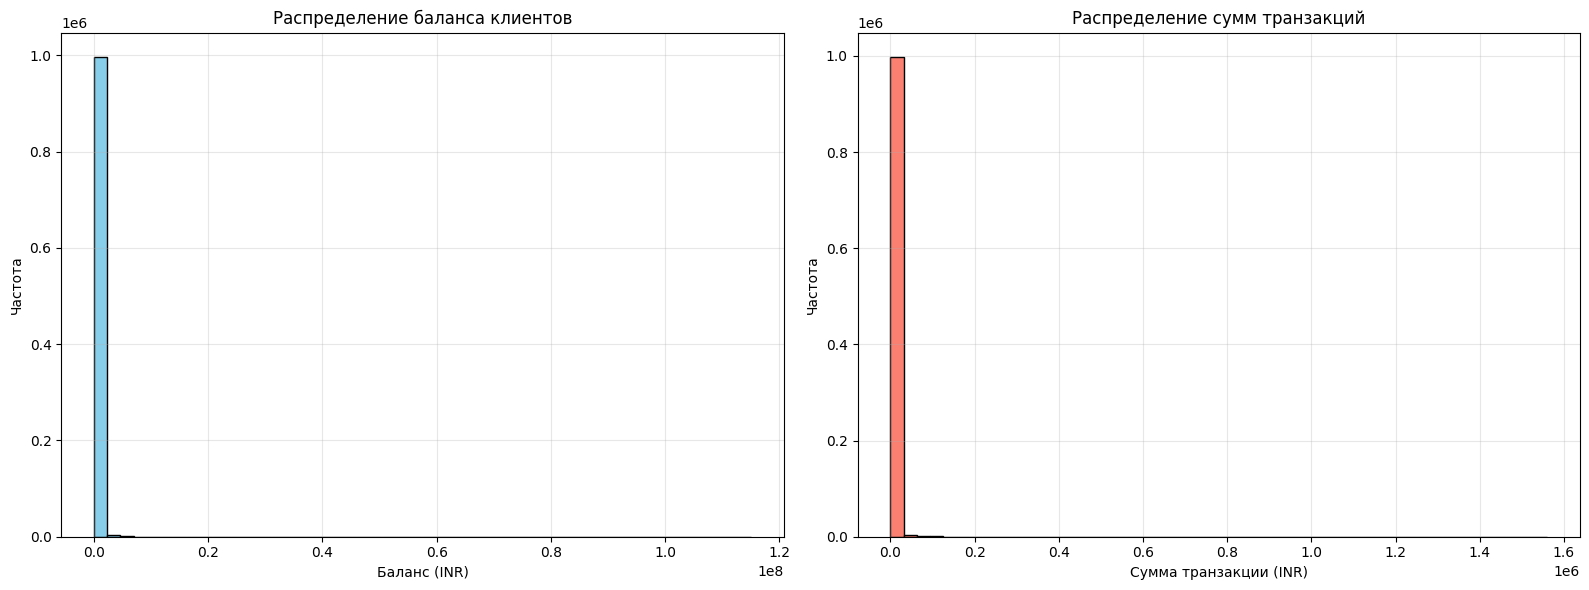

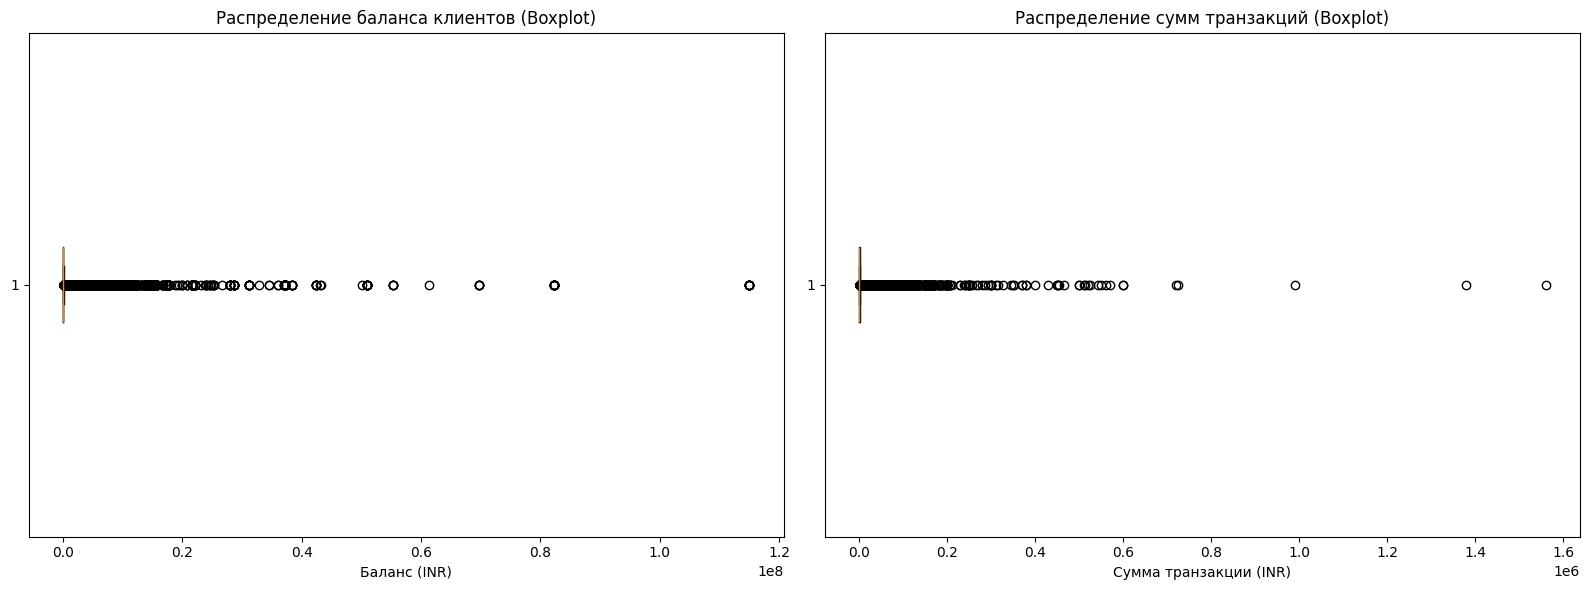

Статистика по балансу клиентов (custaccountbalance):
count    1.002832e+06
mean     1.086520e+05
std      8.267108e+05
min      0.000000e+00
25%      4.627610e+03
50%      1.622600e+04
75%      5.485613e+04
max      1.150355e+08

Статистика по суммам транзакций (transactionamount(inr)):
count    1.002832e+06
mean     1.488285e+03
std      6.259150e+03
min      0.000000e+00
25%      1.550000e+02
50%      4.400000e+02
75%      1.150000e+03
max      1.560035e+06
Медианное значение баланса клиентов (custaccountbalance): 16,226.00 INR
Медианное значение суммы транзакции (transactionamount(inr)): 440.00 INR
- баланс меньше медианы: 501395
- транзакция меньше медианы: 500338


In [56]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount

import matplotlib.pyplot as plt

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма для custaccountbalance
ax1.hist(df['custaccountbalance'].dropna(), bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Распределение баланса клиентов')
ax1.set_xlabel('Баланс (INR)')
ax1.set_ylabel('Частота')
ax1.grid(True, alpha=0.3)

# Гистограмма для transactionamount(inr)
ax2.hist(df['transactionamount(inr)'].dropna(), bins=50, color='salmon', edgecolor='black')
ax2.set_title('Распределение сумм транзакций')
ax2.set_xlabel('Сумма транзакции (INR)')
ax2.set_ylabel('Частота')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot для custaccountbalance
ax1.boxplot(df['custaccountbalance'].dropna(), vert=False)
ax1.set_title('Распределение баланса клиентов (Boxplot)')
ax1.set_xlabel('Баланс (INR)')

# Boxplot для transactionamount(inr)
ax2.boxplot(df['transactionamount(inr)'].dropna(), vert=False)
ax2.set_title('Распределение сумм транзакций (Boxplot)')
ax2.set_xlabel('Сумма транзакции (INR)')

plt.tight_layout()
plt.show()

print("Статистика по балансу клиентов (custaccountbalance):")
print(df['custaccountbalance'].describe().to_string())
print("\nСтатистика по суммам транзакций (transactionamount(inr)):")
print(df['transactionamount(inr)'].describe().to_string())
median_balance = df['custaccountbalance'].median()
median_transaction = df['transactionamount(inr)'].median()
print(f"Медианное значение баланса клиентов (custaccountbalance): {median_balance:,.2f} INR")
print(f"Медианное значение суммы транзакции (transactionamount(inr)): {median_transaction:,.2f} INR")

print(f"- баланс меньше медианы: {(df['custaccountbalance'] < median_balance).sum()}")
print(f"- транзакция меньше медианы: {(df['transactionamount(inr)'] < median_transaction).sum()}")

Описательные статистики возраста клиентов:
count    1.002832e+06
mean     4.002650e+01
std      8.753849e+00
min      0.000000e+00
25%      3.400000e+01
50%      3.800000e+01
75%      4.300000e+01
max      9.900000e+01
Name: age, dtype: float64

Мода (наиболее частый возраст): 35
Медиана: 38.0


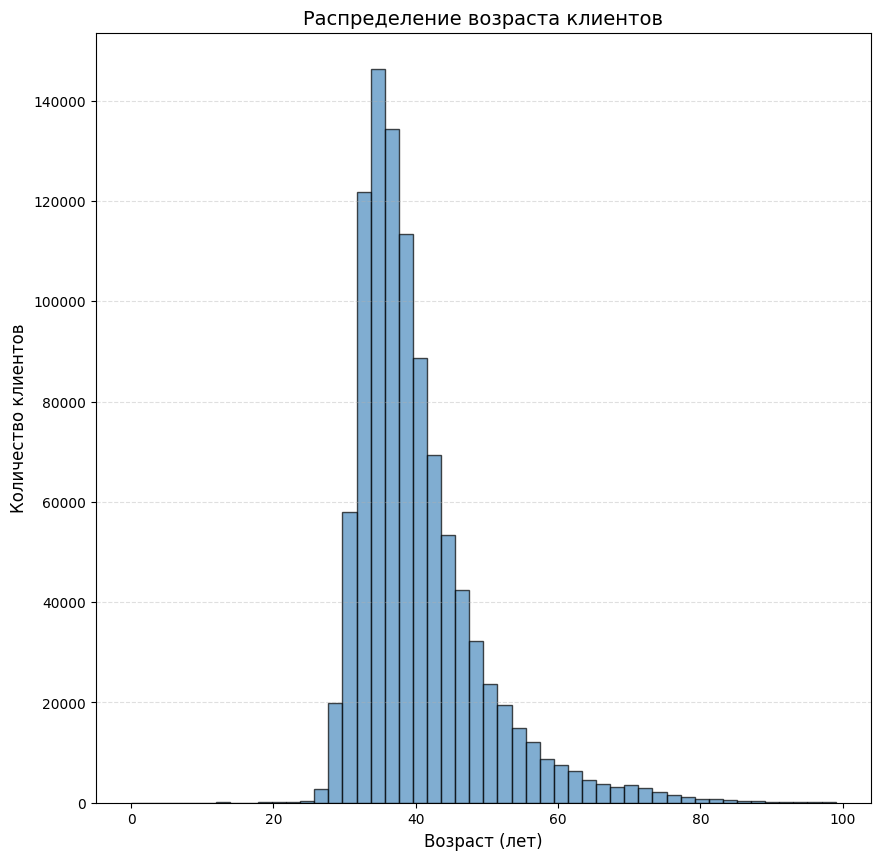

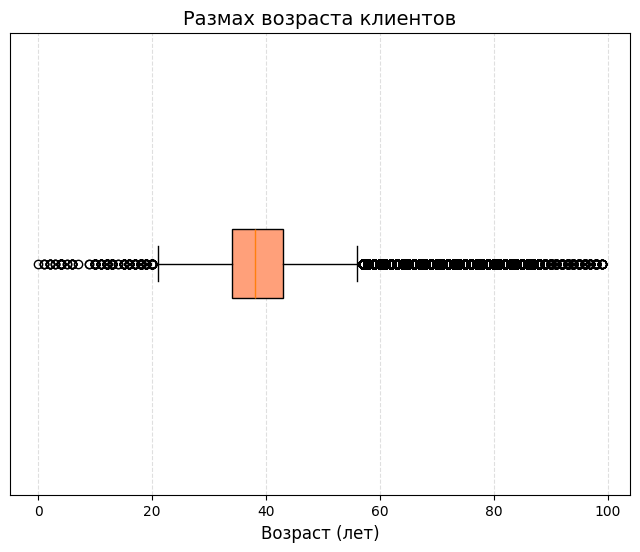

Отрицательных значений возраста не обнаружено.


In [60]:
# изучить возраст клиентов (визуализировать)

from datetime import datetime

# Преобразуем дату рождения в datetime
df['customerdob'] = pd.to_datetime(df['customerdob'], errors='coerce')

# Рассчитываем возраст (на сегодняшний день)
current_year = datetime.now().year
df['age'] = current_year - df['customerdob'].dt.year

# Удаляем некорректные значения (если есть)
df = df.dropna(subset=['age'])

print("Описательные статистики возраста клиентов:")
print(df['age'].describe())

# Дополнительно: мода и медиана
print(f"\nМода (наиболее частый возраст): {df['age'].mode()[0]}")
print(f"Медиана: {df['age'].median()}")

plt.figure(figsize=(10, 10))
plt.hist(df['age'], bins=50, color='#4B8BBE', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста клиентов', fontsize=14)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#FFA07A'))
plt.title('Размах возраста клиентов', fontsize=14)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

# Находим строки, где возраст отрицательный
negative_ages = df[df['age'] > 100]

# Проверяем, есть ли такие значения
if not negative_ages.empty:
    print("Найдены некорректные значения возраста (меньше 0):")
    print(negative_ages[['customerid', 'customerdob', 'age']])
else:
    print("Отрицательных значений возраста не обнаружено.")

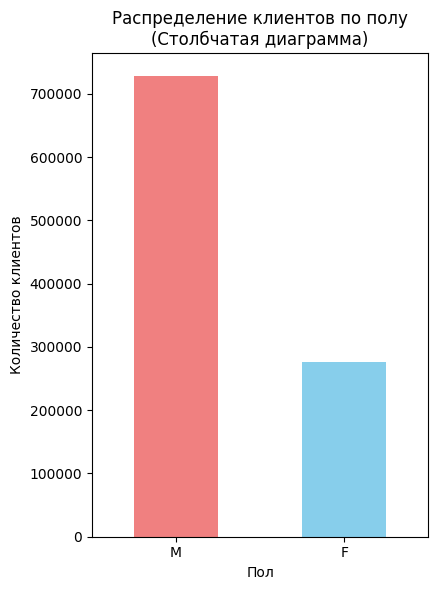


Статистика по полу клиентов:
custgender
M    727378
F    275454
Name: count, dtype: int64

Всего клиентов: 1002832


In [61]:
# изучить пол клиентов (визуализировать)

# Подготовка данных
gender_counts = df['custgender'].value_counts()

# Создаем фигуру
plt.figure(figsize=(8, 6))

# Столбчатая диаграмма
plt.subplot(1, 2, 2)
gender_counts.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Распределение клиентов по полу\n(Столбчатая диаграмма)')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)

# Настройки отображения
plt.tight_layout()
plt.show()

# Дополнительная статистика
print("\nСтатистика по полу клиентов:")
print(gender_counts)
print(f"\nВсего клиентов: {len(df)}")

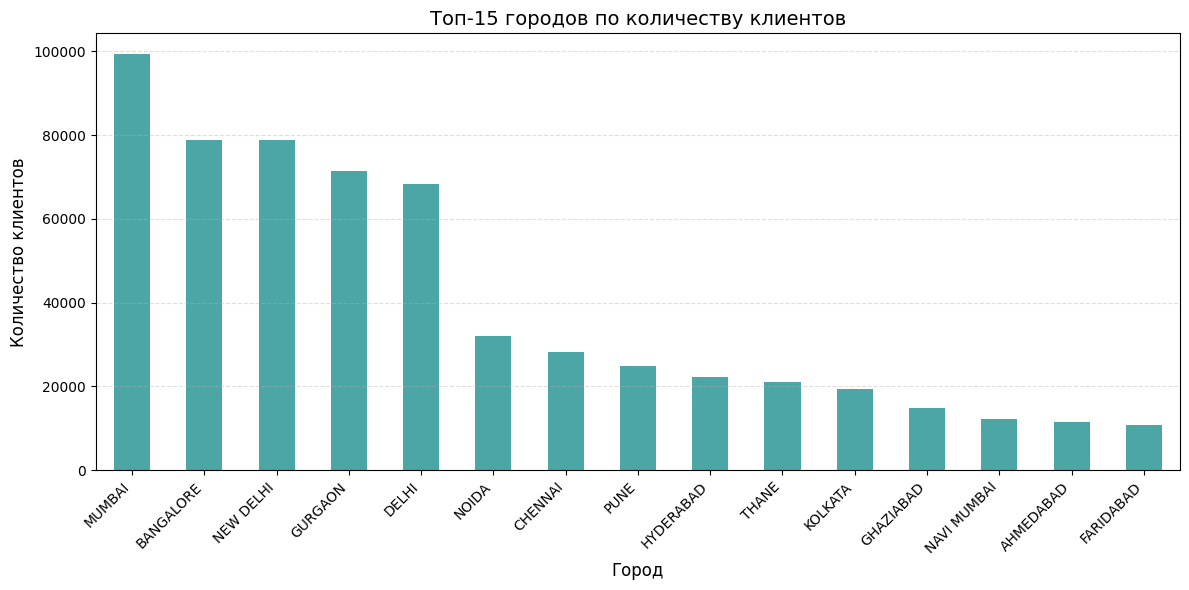

In [62]:
# изучить место жительства клиентов (визуализировать)

# Подготовка данных (предположим, что есть столбец 'city')
top_cities = df['custlocation'].value_counts().head(15)

# Столбчатая диаграмма
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Топ-15 городов по количеству клиентов', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

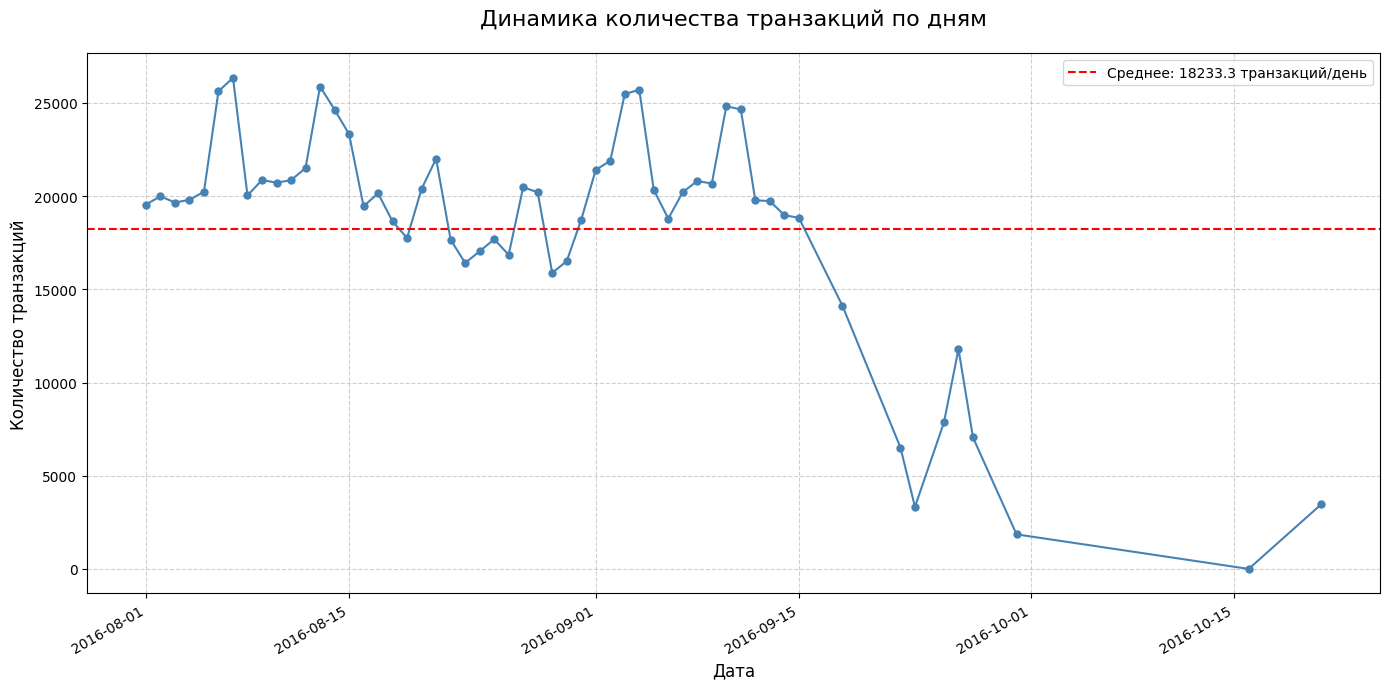


Статистика по дням:
Всего дней: 55
Максимальное количество транзакций: 26341 (дата: 2016-08-07)
Минимальное количество транзакций: 2 (дата: 2016-10-16)
Среднее количество транзакций в день: 18233.3


In [63]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)

import matplotlib.dates as mdates

# 1. Преобразуем дату транзакции в datetime (если еще не сделано)
#df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# 2. Группируем транзакции по дате и считаем количество
daily_transactions = df.groupby(df['transactiondate'].dt.date)['transactionid'].count()

# 3. Создаем график
plt.figure(figsize=(14, 7))

# Линейный график динамики
plt.plot(daily_transactions.index,
         daily_transactions.values,
         marker='o',
         linestyle='-',
         color='steelblue',
         markersize=5)

# Настройки оформления
plt.title('Динамика количества транзакций по дням', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Форматирование дат на оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()  # Наклон подписей дат

# Добавляем среднюю линию
mean_val = daily_transactions.mean()
plt.axhline(mean_val, color='red', linestyle='--',
            label=f'Среднее: {mean_val:.1f} транзакций/день')

plt.legend()
plt.tight_layout()
plt.show()

# Дополнительная статистика
print("\nСтатистика по дням:")
print(f"Всего дней: {len(daily_transactions)}")
print(f"Максимальное количество транзакций: {daily_transactions.max()} (дата: {daily_transactions.idxmax()})")
print(f"Минимальное количество транзакций: {daily_transactions.min()} (дата: {daily_transactions.idxmin()})")
print(f"Среднее количество транзакций в день: {daily_transactions.mean():.1f}")

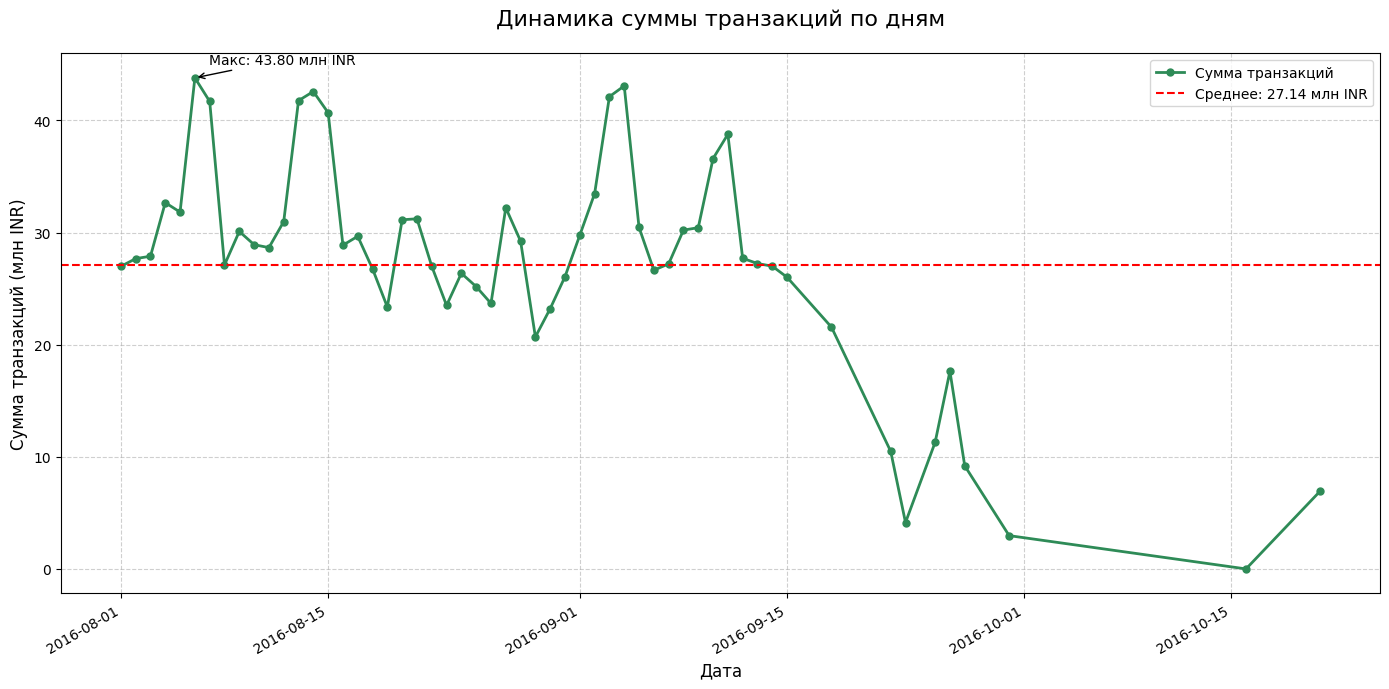


Статистика по сумме транзакций:
Период: с 2016-08-01 по 2016-10-21
Суммарный оборот: 1492.50 млн INR
Среднедневной оборот: 27.14 млн INR
Максимальный день: 2016-08-06 (43.80 млн INR)
Минимальный день: 2016-10-16 (0.00 млн INR)


In [64]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)

# 1. Преобразование даты и подготовка данных
#df['transactiondate'] = pd.to_datetime(df['transactiondate'])
daily_amount = df.groupby(df['transactiondate'].dt.date)['transactionamount(inr)'].sum()

# 2. Создание графика
plt.figure(figsize=(14, 7))

# Основной график (линия)
plt.plot(daily_amount.index,
         daily_amount.values/1e6,  # Переводим в миллионы для удобства чтения
         linewidth=2,
         color='#2e8b57',
         marker='o',
         markersize=5,
         label='Сумма транзакций')

# Настройки оформления
plt.title('Динамика суммы транзакций по дням', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма транзакций (млн INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Форматирование дат
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

# Добавляем среднюю линию и аннотации
mean_val = daily_amount.mean()/1e6
max_val = daily_amount.max()/1e6
max_date = daily_amount.idxmax()
min_val = daily_amount.min()/1e6
min_date = daily_amount.idxmin()

plt.axhline(mean_val, color='red', linestyle='--',
            label=f'Среднее: {mean_val:.2f} млн INR')
plt.annotate(f'Макс: {max_val:.2f} млн INR',
             xy=(max_date, max_val),
             xytext=(10, 10),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'))

plt.legend()
plt.tight_layout()
plt.show()

# 3. Дополнительная аналитика
print("\nСтатистика по сумме транзакций:")
print(f"Период: с {daily_amount.index.min()} по {daily_amount.index.max()}")
print(f"Суммарный оборот: {daily_amount.sum()/1e6:.2f} млн INR")
print(f"Среднедневной оборот: {mean_val:.2f} млн INR")
print(f"Максимальный день: {max_date} ({max_val:.2f} млн INR)")
print(f"Минимальный день: {min_date} ({min_val:.2f} млн INR)")

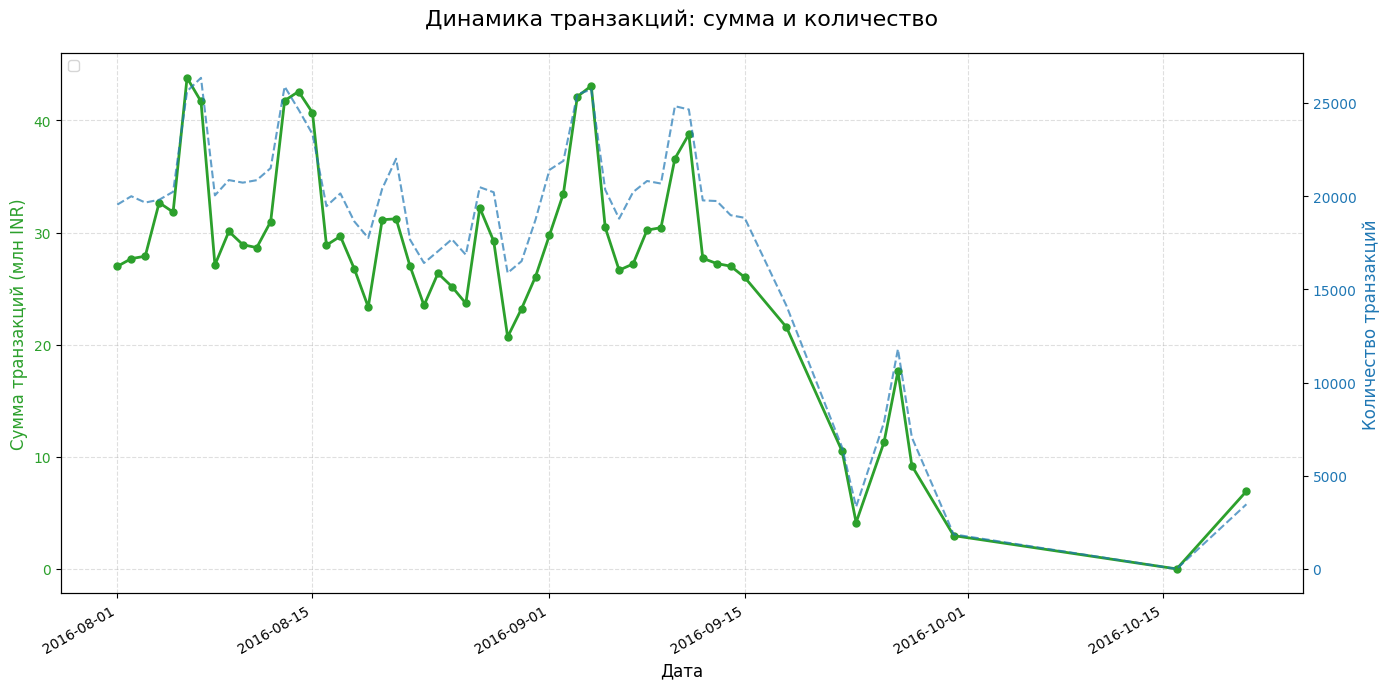

Корреляция между суммой и количеством транзакций: 0.975


In [65]:
# Подготовка данных
daily_data = df.groupby(df['transactiondate'].dt.date).agg(
    total_amount=('transactionamount(inr)', 'sum'),
    transaction_count=('transactionid', 'count')
)

# Создание фигуры с двумя осями Y
fig, ax1 = plt.subplots(figsize=(14, 7))

# График суммы транзакций (левая ось)
color = 'tab:green'
ax1.set_xlabel('Дата', fontsize=12)
ax1.set_ylabel('Сумма транзакций (млн INR)', color=color, fontsize=12)
ax1.plot(daily_data.index, daily_data['total_amount']/1e6,
         color=color, linewidth=2, marker='o', markersize=5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.4)

# Создание второй оси Y для количества транзакций
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Количество транзакций', color=color, fontsize=12)
ax2.plot(daily_data.index, daily_data['transaction_count'],
         color=color, linestyle='--', alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

# Форматирование дат
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.autofmt_xdate()

# Добавление заголовка и легенды
plt.title('Динамика транзакций: сумма и количество', fontsize=16, pad=20)

# Добавление единой легенды
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Сумма транзакций', 'Количество транзакций'],
           loc='upper left')

plt.tight_layout()
plt.show()

# Дополнительная аналитика
print("Корреляция между суммой и количеством транзакций:",
      daily_data.corr().iloc[0,1].round(3))

<ipython-input-66-f90a21fa2113>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_analysis = df.groupby('age_group').agg(


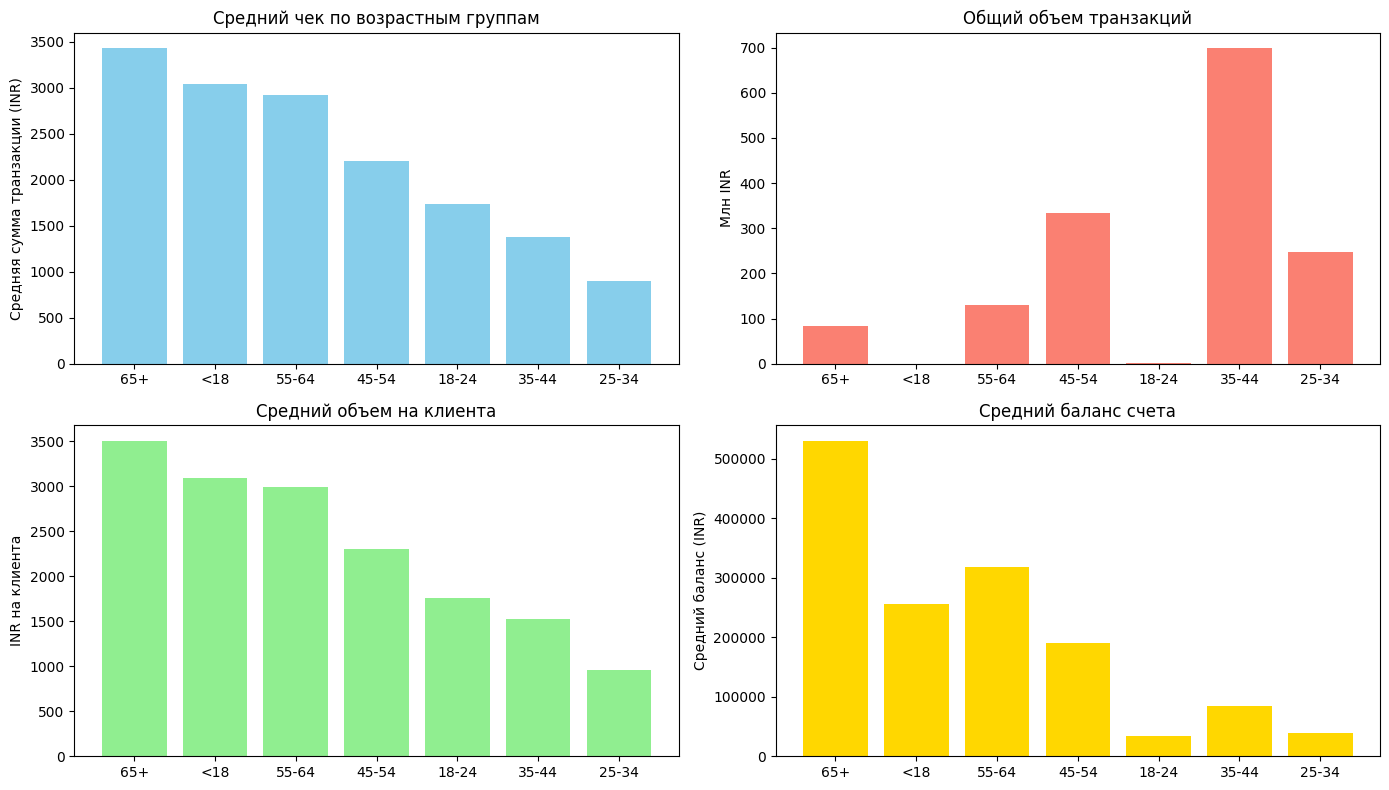


Самая платежеспособная возрастная группа: 65+
Средний чек: 3427.73 INR
Общий объем: 82.94 млн INR
Средний на клиента: 3507.16 INR
Количество клиентов: 23648
Средний баланс: 530102.69 INR


In [66]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

# 1. Рассчитываем возраст клиентов
current_year = pd.Timestamp.now().year
df['age'] = current_year - pd.to_datetime(df['customerdob']).dt.year

# 2. Создаем возрастные группы (корзины)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# 3. Анализируем платежеспособность по группам
payment_analysis = df.groupby('age_group').agg(
    avg_transaction=('transactionamount(inr)', 'mean'),
    total_volume=('transactionamount(inr)', 'sum'),
    customers=('customerid', 'nunique'),
    avg_balance=('custaccountbalance', 'mean')
).reset_index()

# 4. Добавляем расчет среднего чека и объема на клиента
payment_analysis['avg_per_customer'] = payment_analysis['total_volume'] / payment_analysis['customers']
payment_analysis = payment_analysis.sort_values('avg_per_customer', ascending=False)

# 5. Визуализация результатов
plt.figure(figsize=(14, 8))

# График среднего чека
plt.subplot(2, 2, 1)
plt.bar(payment_analysis['age_group'], payment_analysis['avg_transaction'], color='skyblue')
plt.title('Средний чек по возрастным группам')
plt.ylabel('Средняя сумма транзакции (INR)')

# График общего объема
plt.subplot(2, 2, 2)
plt.bar(payment_analysis['age_group'], payment_analysis['total_volume']/1e6, color='salmon')
plt.title('Общий объем транзакций')
plt.ylabel('Млн INR')

# График среднего на клиента
plt.subplot(2, 2, 3)
plt.bar(payment_analysis['age_group'], payment_analysis['avg_per_customer'], color='lightgreen')
plt.title('Средний объем на клиента')
plt.ylabel('INR на клиента')

# График среднего баланса
plt.subplot(2, 2, 4)
plt.bar(payment_analysis['age_group'], payment_analysis['avg_balance'], color='gold')
plt.title('Средний баланс счета')
plt.ylabel('Средний баланс (INR)')

plt.tight_layout()
plt.show()

# 6. Определение самой платежеспособной группы
most_paying_group = payment_analysis.iloc[0]
print(f"\nСамая платежеспособная возрастная группа: {most_paying_group['age_group']}")
print(f"Средний чек: {most_paying_group['avg_transaction']:.2f} INR")
print(f"Общий объем: {most_paying_group['total_volume']/1e6:.2f} млн INR")
print(f"Средний на клиента: {most_paying_group['avg_per_customer']:.2f} INR")
print(f"Количество клиентов: {most_paying_group['customers']}")
print(f"Средний баланс: {most_paying_group['avg_balance']:.2f} INR")

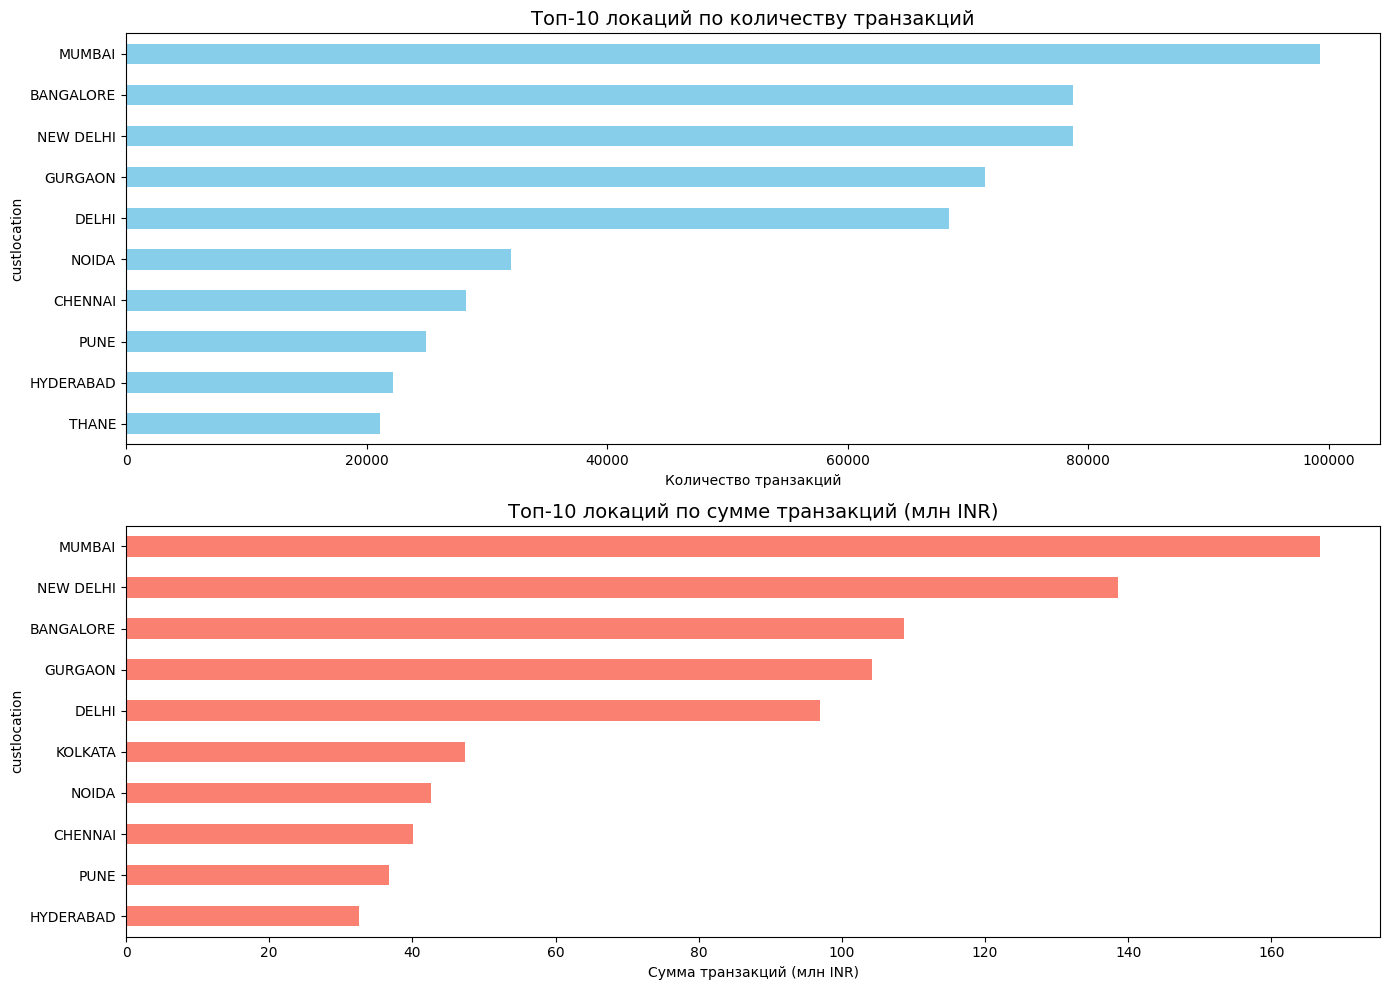

Топ-10 локаций по количеству транзакций:
+-----------+--------------+
| Локация   |   Количество |
+===========+==============+
| MUMBAI    |        99298 |
+-----------+--------------+
| BANGALORE |        78772 |
+-----------+--------------+
| NEW DELHI |        78702 |
+-----------+--------------+
| GURGAON   |        71429 |
+-----------+--------------+
| DELHI     |        68423 |
+-----------+--------------+
| NOIDA     |        31998 |
+-----------+--------------+
| CHENNAI   |        28226 |
+-----------+--------------+
| PUNE      |        24901 |
+-----------+--------------+
| HYDERABAD |        22163 |
+-----------+--------------+
| THANE     |        21150 |
+-----------+--------------+

Топ-10 локаций по сумме транзакций:
+-----------+-------------------+
| Локация   |   Сумма (млн INR) |
+===========+===================+
| MUMBAI    |            166.84 |
+-----------+-------------------+
| NEW DELHI |            138.55 |
+-----------+-------------------+
| BANGALORE |    

In [67]:
# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

# 1. Топ-10 локаций по количеству транзакций
top10_count = df['custlocation'].value_counts().head(10)

# 2. Топ-10 локаций по сумме транзакций
top10_amount = df.groupby('custlocation')['transactionamount(inr)'].sum().nlargest(10)

# 3. Визуализация
plt.figure(figsize=(14, 10))

# График количества транзакций
plt.subplot(2, 1, 1)
top10_count.plot(kind='barh', color='skyblue')
plt.title('Топ-10 локаций по количеству транзакций', fontsize=14)
plt.xlabel('Количество транзакций')
plt.gca().invert_yaxis()

# График суммы транзакций
plt.subplot(2, 1, 2)
(top10_amount/1e6).plot(kind='barh', color='salmon')  # Переводим в миллионы
plt.title('Топ-10 локаций по сумме транзакций (млн INR)', fontsize=14)
plt.xlabel('Сумма транзакций (млн INR)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# 4. Вывод таблиц с данными
print("Топ-10 локаций по количеству транзакций:")
print(top10_count.to_markdown(tablefmt="grid", headers=["Локация", "Количество"]))
print("\nТоп-10 локаций по сумме транзакций:")
print((top10_amount/1e6).round(2).to_markdown(tablefmt="grid", headers=["Локация", "Сумма (млн INR)"]))

Описательная статистика времени транзакций (в минутах):
count    1.002832e+06
mean     2.622068e+00
std      8.545466e-01
min      0.000000e+00
25%      2.069267e+00
50%      2.741800e+00
75%      3.335333e+00
max      3.932650e+00
Name: transaction_minutes, dtype: float64


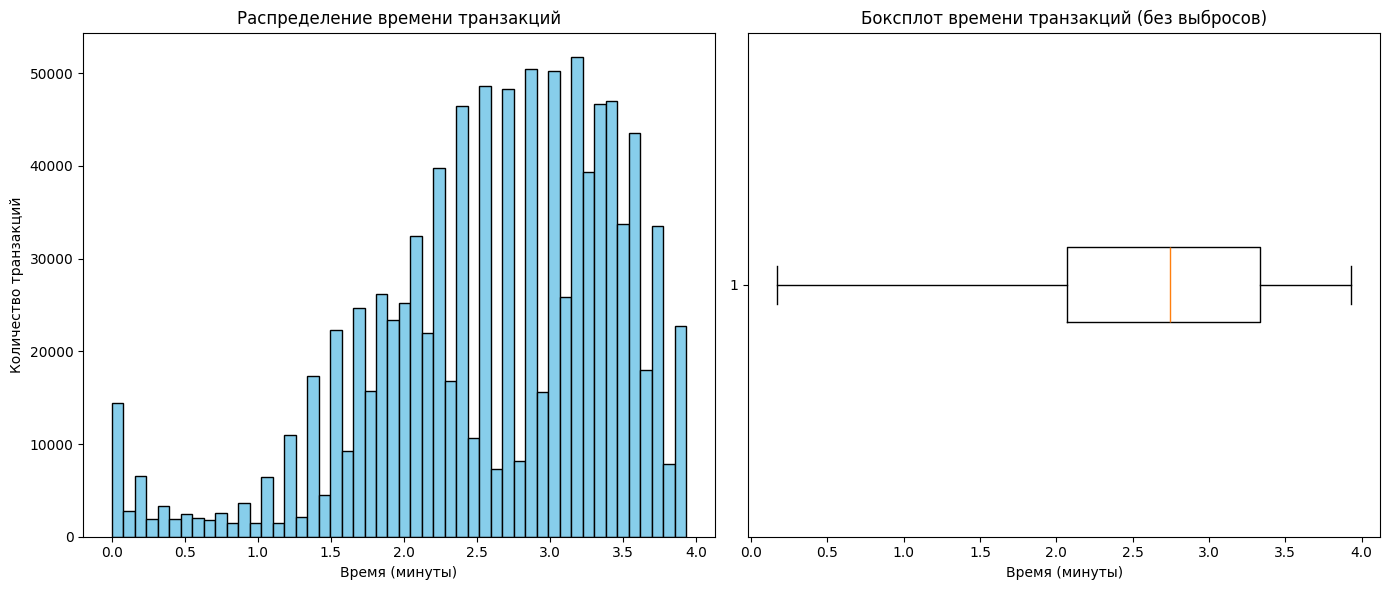

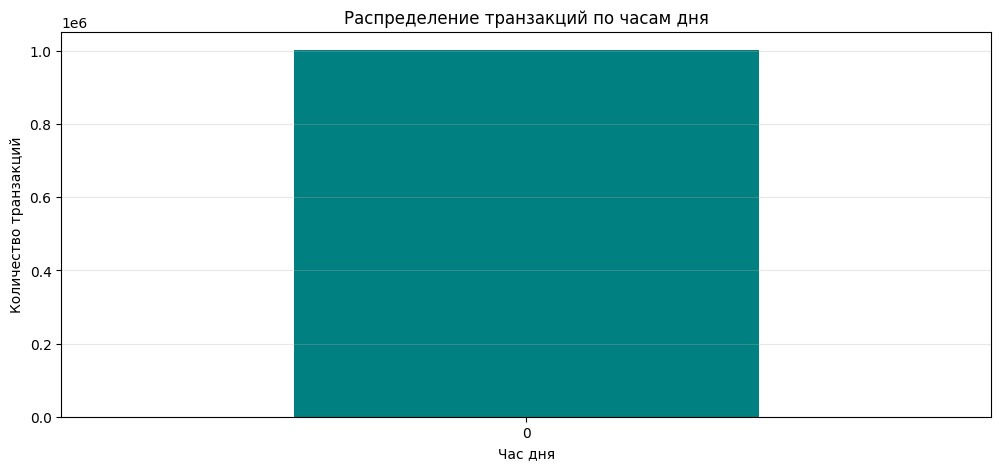


Топ-5 самых долгих транзакций:
       transactionid  transaction_minutes
243376       T243377              3.93265
263276       T263277              3.93265
433834       T433835              3.93265
596163       T596164              3.93265
685283       T685284              3.93265


In [69]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

# 1. Преобразование времени транзакции из миллисекунд в минуты
df['transaction_minutes'] = df['transactiontime'] / (1000 * 60)  # мс → секунды → минуты

# 2. Анализ распределения
print("Описательная статистика времени транзакций (в минутах):")
print(df['transaction_minutes'].describe())

# 3. Визуализация распределения
plt.figure(figsize=(14, 6))

# Гистограмма основного диапазона
plt.subplot(1, 2, 1)
plt.hist(df['transaction_minutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение времени транзакций')
plt.xlabel('Время (минуты)')
plt.ylabel('Количество транзакций')

# Боксплот без выбросов
plt.subplot(1, 2, 2)
plt.boxplot(df['transaction_minutes'], vert=False, showfliers=False)
plt.title('Боксплот времени транзакций (без выбросов)')
plt.xlabel('Время (минуты)')

plt.tight_layout()
plt.show()

# 4. Анализ по часам дня (если время - timestamp)
try:
    df['transaction_hour'] = pd.to_datetime(df['transactiontime'], unit='ms').dt.hour
    hourly_dist = df['transaction_hour'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))
    hourly_dist.plot(kind='bar', color='teal')
    plt.title('Распределение транзакций по часам дня')
    plt.xlabel('Час дня')
    plt.ylabel('Количество транзакций')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.show()
except:
    print("\nНевозможно преобразовать в часы - данные не являются timestamp")

# 5. Вывод топ-5 самых долгих транзакций
print("\nТоп-5 самых долгих транзакций:")
print(df.nlargest(5, 'transaction_minutes')[['transactionid', 'transaction_minutes']])

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1 клиенты имеют возраст от 19 до практически 100 лет, основная масса 30-55 лет

2 всего 839081 клиентов

3 совершено 170352 транзакции, т.е. 1.17 транзакции на каждеге клиента

4 основная масса клиентов имеет небольшой баланс счета и оперирует небольшими суммами, что подтверждает медианное значение по
размеру баланса и транзакций

5 медианное значение возраста 38 лет, основная масса сосредоточена в диапазоне 30-60 лет

6 основные клиенты мужчины 72,7%

7 по местам проживания клиенты распределились
	Mumbai
	Bangalore
	New Delhi
	Gurgaon
	Delhi

8 динамика транзакций
всего дней: 55
максимальное количество транзакций: 26341 (дата: 2016-08-07)
минимальное количество транзакций: 2 (дата: 2016-10-16)
среднее количество транзакций в день: 18233.3
меньше среднего 17 транзакций

9 статистика по сумме транзакций:
период: с 2016-08-01 по 2016-10-21
суммарный оборот: 1492.50 млн INR
среднедневной оборот: 27.14 млн INR
максимальный день: 2016-08-06 (43.80 млн INR)
минимальный день: 2016-10-16 (0.00 млн INR)

10 самая платежеспособная возрастная группа: 65+
средний чек: 3427.73 INR
общий объем: 82.94 млн INR
средний на клиента: 3507.16 INR
количество клиентов: 23648
средний баланс: 530102.69 INR

11 топ-10 локаций по количеству транзакций:
+-----------+--------------+
| Локация   |   Количество |
+===========+==============+
| MUMBAI    |        99298 |
+-----------+--------------+
| BANGALORE |        78772 |
+-----------+--------------+
| NEW DELHI |        78702 |
+-----------+--------------+
| GURGAON   |        71429 |
+-----------+--------------+
| DELHI     |        68423 |
+-----------+--------------+
| NOIDA     |        31998 |
+-----------+--------------+
| CHENNAI   |        28226 |
+-----------+--------------+
| PUNE      |        24901 |
+-----------+--------------+
| HYDERABAD |        22163 |
+-----------+--------------+
| THANE     |        21150 |
+-----------+--------------+

Топ-10 локаций по сумме транзакций:
+-----------+-------------------+
| Локация   |   Сумма (млн INR) |
+===========+===================+
| MUMBAI    |            166.84 |
+-----------+-------------------+
| NEW DELHI |            138.55 |
+-----------+-------------------+
| BANGALORE |            108.63 |
+-----------+-------------------+
| GURGAON   |            104.18 |
+-----------+-------------------+
| DELHI     |             96.92 |
+-----------+-------------------+
| KOLKATA   |             47.32 |
+-----------+-------------------+
| NOIDA     |             42.67 |
+-----------+-------------------+
| CHENNAI   |             40.11 |
+-----------+-------------------+
| PUNE      |             36.7  |
+-----------+-------------------+
| HYDERABAD |             32.61 |
+-----------+-------------------+

12 длительнсть транзакций от 2,07 до 3,33 минуты, среднее 2,74, самые долгие транзакции длились 3,93 минуты